# ALP searches with NS battery fireballs

### Literature:

> Neutron star battery origional proposal:

https://arxiv.org/pdf/1601.00017.pdf, https://arxiv.org/pdf/2112.01979.pdf

> ALP calculations:

https://arxiv.org/pdf/2005.00078.pdf, https://arxiv.org/pdf/2104.05727.pdf

Neutron star - BH mergers could produce measurable transients in X-Ray or $\gamma$-rays.  The orbital motion of the neutron star magnet creates a Faraday flux
and corresponding power available for luminosity.

<img src="./figs/loop.png" width="300" height="140">


Some of this power $\mathcal{P}(r)$ could be removed from the system by ALPs. 

Total power available through emf:
$$\mathcal{P}(r)=\frac{2 V_{\mathcal{H}}^2(r)}{\left(\mathcal{R}_{\mathcal{H}}+\mathcal{R}_{\mathrm{NS}}\right)^2} \mathcal{R}_{\mathrm{NS}} \rightarrow \frac{c}{8 \pi} V_{\mathcal{H}}^2(r)$$
with voltage drop 

$$V_{\mathcal{H}}=2 R_{\mathcal{H}}\left[\frac{r\left(\Omega_{\mathrm{orb}}-\Omega_{\mathrm{NS}}\right)}{c}+\frac{S_{\mathrm{BH}}}{4 \sqrt{2}}\right] B_{\mathrm{NS}}\left(\frac{R_{\mathrm{NS}}}{r}\right)^3$$

with 

$\Omega_{\mathrm{orb}}=\sqrt{G\left(M_{\mathrm{BH}}+M_{\mathrm{NS}}\right) / r^3}$. 

In [39]:
import numpy as np
import natpy as nat
nat.set_active_em_system('HEP')

In [2]:
# Constants
MS = nat.const.M_sun
G  = nat.const.G
# Impedence matching conition
# RNS= (4*np.pi / nat.const.c) * nat.Ohm * nat.m
RNS= 10*nat.km
RH =((4*np.pi / nat.const.c) * nat.Ohm * nat.m).convert(nat.km)
BNS= 10**16 * nat.Gauss
MNS= 1.4*MS

def Omega_orb(r,Mbh,Mns=MNS):
    return np.sqrt(G*(Mbh + Mns) / (r)**3)

def Vh(r,Mbh,Mns=MNS,BNS=BNS):
    SBH      = 1
    Omega_NS = 0
    return 2*RH * (    ((1/nat.const.c)*r*Omega_orb(r,Mbh,Mns) - 0) + (1 / (4*np.sqrt(2)) )) * BNS * (RNS / r)**3

def P_SM(r,Mbh,Mns=MNS,BNS=BNS):
    res =  (nat.const.c / (8 * np.pi)) * Vh(r,Mbh,Mns,BNS)**2
    return res


 Because of the steep $\sim r^{-4}$ scaling of BH-battery power, the injected power can be evaluated as $\mathcal{P}\left(r_{\mathrm{mrg}}\right)$, where we take the separation at merger to be $r_{\mathrm{mrg}}=R_{\mathrm{NS}}+R_{\mathcal{H}} = 2R_{\mathrm{NS}}$ (from impedence matching condition). The optically thick pair plasma expands under its own pressure until it   emits as a black body with an effective temperature given approximately by,
$$
T_{\mathrm{eff}}=\left(\frac{\mathcal{P}\left(r_{\mathrm{mrg}}\right)}{4 \pi r_0^2 \sigma_{\mathrm{SB}}}\right)^{1 / 4}
$$
Then at merger:
\begin{align}
\mathcal{P}\left(r_{\mathrm{mrg}}\right) = \mathcal{P}\left(2R_{\mathrm{NS}}\right)
\end{align}
The resistance across the horizon of the BH is  $\mathcal{R}_{\mathcal{H}}=4 \pi / c$


<img src="./figs/power.png" width="400" height="240">


Compare with my calculation:

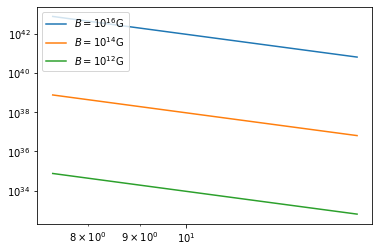

In [3]:
import matplotlib.pyplot as plt
Rinitial = 0.5*nat.const.G * 10*MS  / nat.const.c**2
Rfinal   = nat.const.G * 10*MS  / nat.const.c**2

RonM   = np.linspace(Rinitial,Rfinal.convert(nat.km),20)

plt.plot(RonM.value,P_SM(RonM,10*MS,BNS= (10**16)*nat.Gauss).convert(nat.erg/nat.s),label=r'$B = 10^{16}$G')
plt.plot(RonM.value,P_SM(RonM,10*MS,BNS= (10**14)*nat.Gauss).convert(nat.erg/nat.s),label=r'$B = 10^{14}$G')
plt.plot(RonM.value,P_SM(RonM,10*MS,BNS= (10**12)*nat.Gauss).convert(nat.erg/nat.s),label=r'$B = 10^{12}$G')

plt.yscale('log')
plt.xscale('log')
plt.legend()


In [69]:
Rfinal = 2*nat.const.G * 10*MS  / nat.const.c**2
RNS + RH

<Quantity 10.00003336 km>

### ALP - $B$ field interactions

Energy loss per unit volume:

$\begin{aligned}
Q &=\int \frac{d^3 \mathbf{k}}{(2 \pi)^3} \omega \frac{g_{a \gamma}^2(\hat{\mathbf{k}} \cdot \mathbf{B})^2}{e^{\omega / T}-1} \frac{\pi}{2} \delta\left(\omega-\omega_p\right) \\
&=\frac{g_{a \gamma}^2 B^2}{12 \pi\left(e^{\omega_p / T}-1\right)} \omega_p^3
\end{aligned}$

Need to integrate this over the object volume. Will go as $r$. Gives total luminoscity (in stars/shperical symmetries):

$\begin{aligned}\mathcal{P}=\int_{\odot} d^3 \mathbf{r} \frac{g_{a \gamma}^2 B(r)^2}{12 \pi\left(e^{\omega_p(r) / T}-1\right)} \omega_p(r)^3\, ,\quad \omega_p^2=\frac{4 \pi \alpha n_e}{m_e}\;,\quad B(r)=B_{\mathrm{NS}}\left(\frac{R_\rm{NS}}{r}\right)^3
\end{aligned}$

The electron density $n_e$ is approximated for the NS-battery by $n_{\pm}$ which is the rest-frame, pair number density in thermal equilibrium. We estimate $n_{\pm}$as the electron number density [e.g., 38], true for $k T \ll m_e c^2$, which is always the case in the photosphere for $B_{\mathrm{NS}} \lesssim 10^{16} \mathrm{G}$. Then,
$$
n_{\pm} \approx \frac{4 \pi^{3 / 2}}{h^3}\left(2 m_e k T\right)^{3 / 2} \exp \left(-\frac{\mathrm{m}_{\mathrm{e}} \mathrm{c}^2}{\mathrm{kT}}\right)
$$
where  $T \sim \gamma T_{\mathrm{ph}}$. They assume $T=T_0$ and hence (need to understand why):
$$T=   (1/k) \cdot85 \mathrm{keV}\left(\frac{B_{\mathrm{NS}}}{10^{12} G}\right)^{1 / 2}$$



The power integral reduces to a single dimentional integral 

$\begin{aligned}\mathcal{P}(r_\rm{merge})= \int_0^{r_\rm{merge}} dr\frac{  (R_\rm{NS})^3 4\pi g_{a \gamma}^2}{12 \pi\left(e^{\omega_p(r) / T}-1\right) } B^2_{\mathrm{NS}}\left(\frac{1}{r}\right)^4\omega_p(r)^3\,
\end{aligned}$

From the pair density at the photosphere we estimate the plasma frequency to be (at merger),
$$
\omega_p=\sqrt{\frac{n_{\pm} e^2}{\pi m_e}} \lesssim 4.4 \times 10^{12} \mathrm{~Hz}\left(\frac{\mathrm{B}_{\mathrm{NS}}}{10^{12} \mathrm{G}}\right)^{-0.26}
$$

Thus, we can approximate the radially dependent power as having a simple r depedence:

\begin{align}
\mathcal{P}(r_\rm{merge}) &\sim \frac{  (R_\rm{NS})^6 4\pi }{12 \pi\left(e^{\omega_p / T}-1\right) }g_{a \gamma}^2 B^2_{\mathrm{NS}} \omega_p^3\int_{r_\rm{initial}}^{r_\rm{merge}} dr\left(\frac{1}{r}\right)^4\, \\
&= \frac{  (R_\rm{NS})^6 4\pi }{12 \pi\left(e^{\omega_p / T}-1\right) }g_{a \gamma}^2 B^2_{\mathrm{NS}} \omega_p^3 \cdot \left(\frac{1}{3r_\rm{merge}^3} - \frac{1}{3r_\rm{initial}^3}\right)
\end{align} 


In [70]:
# def omegaP(r,Mbh,Mns=MNS,BNS=BNS):
#     return np.sqrt((4*np.pi*nat.const.alpha*ne(r,Mbh,Mns=MNS,BNS=BNS)) * (1/nat.const.m_e) )

# Redefine BNS
BNS    = 1E12 * nat.Gauss

# For now keep plasma freq. constant: 
# - Take upper limit here to maximise power. 
omegaP = nat.const.hbar * 4.4 * 1E12 * nat.Hz * (BNS / (1E12*nat.Gauss))**(-0.26)

# Take constant photosphere temp to be originating from SM. Not sure how to derive this from ALP contributions? 
Tc     =  85 * nat.keV * (BNS/(1E12*nat.Gauss))**(0.5)

# Electron density. need factor since this is the pair density?
def T(r,Mbh,Mns=MNS,BNS=BNS):
    P   = P_SM(r,Mbh,Mns=MNS,BNS=BNS)
    res = P / (4 * np.pi * (r**2) * nat.const.sigma_sb)
    return res**(0.25)

def ne(r,Mbh,Mns=MNS,BNS=BNS):
    return ((4*np.pi**(1.5)) / (nat.const.h**3)) * ((2 * nat.const.m_e * nat.const.k_B * T(r,Mbh,Mns=MNS,BNS=BNS))**1.5) * np.exp( - (nat.const.m_e * nat.const.c**2) / (nat.const.k_B * T(r,Mbh,Mns=MNS,BNS=BNS)))

def P_mag(ga,Mbh,Mns=MNS,BNS=BNS):
    pre    = ((RNS**6) * 4 * np.pi) / (12*np.pi * ( np.exp(omegaP/Tc) -1)  )
    rmerge = RNS + RH
    return pre * (ga**2) * (BNS**2) * (omegaP**3) * ( 1 / (3 * (rmerge**3)) )  

gay_range = np.linspace(1E-12,1E-10,20)*(nat.GeV**(-1))



In [71]:
P_mag(1E-11 * (nat.GeV**(-1)),10*MS).convert(nat.erg*nat.s**(-1))


##################################################################
# Plot 

<Quantity 9.57708451e+14 erg / s>


Gives rise to blackbody temperature:
$$T_{\mathrm{eff}}=\left(\frac{\mathcal{P}\left(r_{\mathrm{mrg}}\right)}{4 \pi r_0^2 \sigma_{\mathrm{SB}}}\right)^{1 / 4}$$

The resulting spectrum is found from integrating the multicomponent black-body emission over a sphere of radius $R_{\rm{ph}}$ that is expanding with Lorentz factor $\gamma=R_{\rm{ph}} / r_0$ and with rest frame photosphere temperature $T_0 / \gamma$, for initial injection temperature $T_0$. This calculation is carried out in full in 1601.00017 but we need to do this assuming power loss from ALP production. 

That is, 

$$T_0 = T_{0_\rm{SM}} - T_{0_\rm{ALP}}$$


The observable flux is estimated as 

$$F_{\mathrm{FB}, \mathrm{obs}} \approx 2 \pi \mathcal{K}\left(1-\cos \gamma^{-1}\right)\left(\frac{R_{\mathrm{ph}}}{D_L}\right)^2 \int_{\nu_{\min }}^{\nu_{\max }} \frac{2 h \nu^3}{c^2} \frac{d \nu}{\exp \left[\frac{\mathrm{h} \nu}{\mathrm{kT_0}}\right]-1},$$

This has a peak frequency 

$$h \nu_{\text {peak }}=0.24 \mathrm{MeV}\left(\frac{B_{\mathrm{NS}}}{10^{12} G}\right)^{1 / 2}$$

in the SM only regime. 

### Primakoff effect 
(might not need in our system?)
$$
Q=\frac{g_{a \gamma}^2 T^7}{4 \pi} F\left(k_{\mathrm{S}}^2\right),
$$
where
$$
k_{\mathrm{S}}^2=\frac{4 \pi \alpha}{T} n_e+\frac{4 \pi \alpha}{T} \sum_j n_j Z_j^2
$$
is the Debye screening scale in a nonrelativistic, nondegenerate plasma and
$$
\begin{aligned}
F\left(k_{\mathrm{S}}^2\right) &=\frac{k_{\mathrm{S}}^2}{2 \pi^2 T^6} \int_0^{\infty} d \omega \frac{\omega}{e^{\omega / T}-1} \\
& \times\left[\left(\omega^2+k_{\mathrm{S}}^2\right) \ln \left(1+\frac{\omega^2}{k_{\mathrm{S}}^2}\right)-\omega^2\right]
\end{aligned}
$$

### $\gamma \gamma \rightarrow $ ALP

In [4]:
80.45+19.99+6+20.06+28.89+12.15

167.54